## 📚 Prerequisites

Ensure that your Azure Services are properly set up, your Conda environment is created, and your environment variables are configured as per the instructions in the [SETTINGS.md](SETTINGS.md) file.

## 📋 Table of Contents

This notebook assists in conducting a comprehensive performance assessment for Azure OpenAI endpoints, focusing on the operational efficiency of the model in processing requests. The following sections are covered:

1. [**Analyzing Test Results**](#analyzing-test-results): This section provides guidance on how to analyze the results from the latency and throughput tests, helping you understand the performance metrics and their implications on the operational efficiency of your model.

For additional information, refer to the following resources:
- [Azure OpenAI API Documentation](https://learn.microsoft.com/en-us/azure/ai-services/openai/reference)

In [1]:
import os
from datetime import datetime

# Define the target directory
TARGET_DIRECTORY = "C:\\Users\\pablosal\\Desktop\\gbbai-azure-openai-benchmark"

# Get the current working directory
current_directory = os.getcwd()

if current_directory != TARGET_DIRECTORY:
    # Go up one directory from the current working directory
    PARENT_DIRECTORY = os.path.join(current_directory, '..')
    PARENT_DIRECTORY = os.path.realpath(PARENT_DIRECTORY)

    # Change the current working directory to the parent directory
    os.chdir(PARENT_DIRECTORY)
    print(f"Directory changed to {os.getcwd()}")
else:
    print("Current directory is already the target directory.")

Directory changed to C:\Users\pablosal\Desktop\gbbai-azure-openai-benchmark


In [2]:
from src.performance.aoaihelpers.stats import ModelPerformanceVisualizer

In [6]:
import json

def combine_json_files(file1, file2):
    # Read the first JSON file
    with open(file1, 'r') as f1:
        data1 = json.load(f1)

    # Read the second JSON file
    with open(file2, 'r') as f2:
        data2 = json.load(f2)

    # Combine the data from the two JSON files
    combined_data = {**data1, **data2}

    return combined_data

In [7]:
combined_stats_1 = combine_json_files(r'benchmarks\gpt4\swedencentral\gpt-4-0613-ptu\latency\results_iterations=50_time=20240603_143837.json', 
                                    r'benchmarks\gpt-4-turbo\uksouth\gpt-4-turbo-2024-04-09-ptu\latency\results_iterations=50_time=20240603_141425.json')

combined_stats_2 = combine_json_files(r'benchmarks\gpt-4-turbo\swedencentral\gpt-4-turbo-2024-04-09-ptu\latency\results_iterations=50_time=20240515_074212.json', 
                                    r'benchmarks\gpt4\swedencentral\gpt-4-0613-ptu\latency\results_iterations=25_time=20240513_230736.json')

## Latency 0613 vs. 0409 results 

In [8]:
visualizer = ModelPerformanceVisualizer(data=combined_stats_1)

In [9]:
df1, df2 = visualizer.transpose_data()

In [10]:
df1

ModelName_MaxTokens,gpt-4-0613-ptu_100,gpt-4-0613-ptu_500,gpt-4-0613-ptu_700,gpt-4-0613-ptu_800,gpt-4-turbo-2024-04-09-ptu_100,gpt-4-turbo-2024-04-09-ptu_500,gpt-4-turbo-2024-04-09-ptu_700,gpt-4-turbo-2024-04-09-ptu_800
median_time,3.749891,14.861926,19.733834,20.516557,3.221698,12.748368,17.445451,19.11931
regions,[Sweden Central],[Sweden Central],[Sweden Central],[Sweden Central],[UK South],[UK South],[UK South],[UK South]
iqr_time,0.833814,2.157286,1.925164,3.557763,0.146774,0.572932,0.582215,1.597134
percentile_95_time,5.739172,19.402694,24.090648,26.104717,4.065835,13.459763,18.416177,20.027083
percentile_99_time,7.806369,24.526353,27.818186,32.473546,4.401603,13.756297,18.554005,20.417696
cv_time,0.225564,0.150731,0.12066,0.174587,0.08956,0.027093,0.027918,0.055399
median_completion_tokens,100.0,500.0,654.5,684.0,100.0,500.0,700.0,759.5
iqr_completion_tokens,0.0,0.0,62.25,90.25,0.0,0.0,0.0,64.5
percentile_95_completion_tokens,100.0,500.0,700.0,749.65,100.0,500.0,700.0,800.0
percentile_99_completion_tokens,100.0,500.0,700.0,789.22,100.0,500.0,700.0,800.0


In [13]:
df2

ModelName_MaxTokens,gpt-4-turbo-2024-04-09-ptu_100,gpt-4-turbo-2024-04-09-ptu_500,gpt-4-turbo-2024-04-09-ptu_700,gpt-4-turbo-2024-04-09-ptu_800,gpt-4-0613-ptu_100,gpt-4-0613-ptu_500,gpt-4-0613-ptu_800,gpt-4-0613-ptu_700
best_run_time,3.295035,12.608985,15.602438,15.895453,3.469894,13.796731,15.34396,16.90897
best_run_completion_tokens,100,500,626,616,100,500,555,604
best_run_prompt_tokens,1002,1006,1006,1004,1005,1006,1005,1006
best_run_region,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central
best_run_utilization,0.00%,1.33%,0.00%,0.00%,13.52%,57.45%,45.82%,20.38%
best_run_local_time,2024-05-15 14:27:58 CEST,2024-05-15 14:27:34 CEST,2024-05-15 14:40:40 CEST,2024-05-15 14:32:45 CEST,2024-05-14 05:59:24 CEST,2024-05-14 06:01:12 CEST,2024-05-14 06:01:08 CEST,2024-05-14 06:03:58 CEST
worst_run_time,5.877806,15.873206,23.54875,22.314562,4.858917,16.554846,22.069516,22.000213
worst_run_completion_tokens,100,500,700,768,100,500,785,631
worst_run_prompt_tokens,1004,1006,1005,1003,1006,1004,1004,1004
worst_run_region,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central


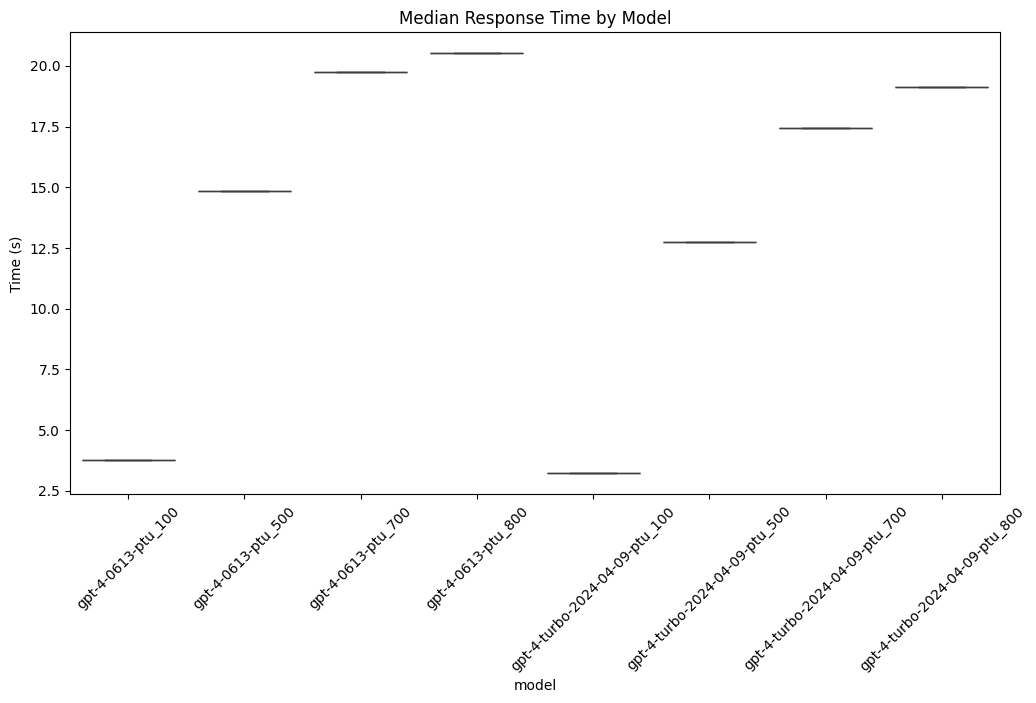

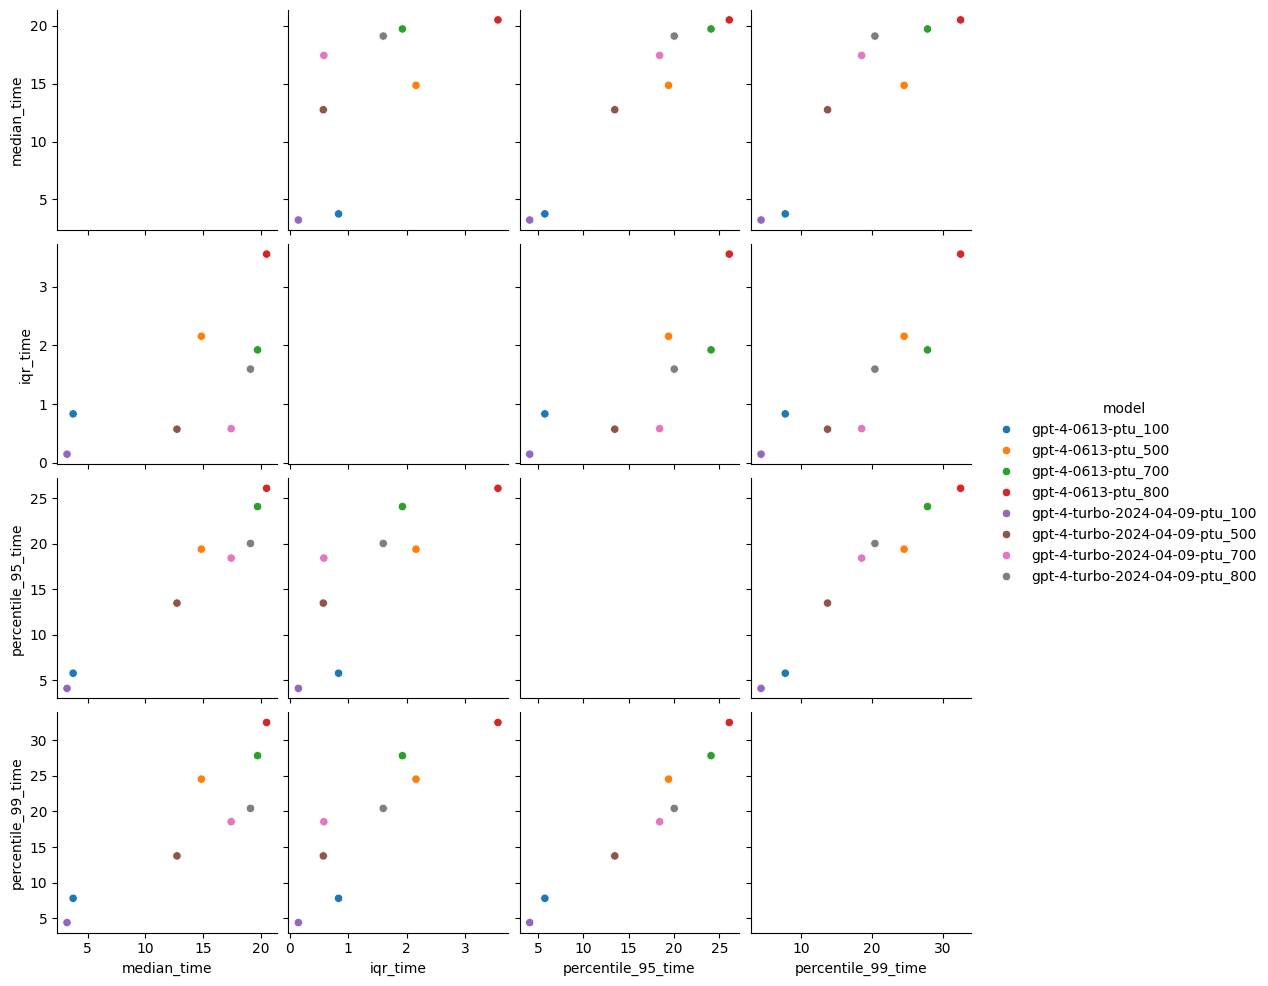

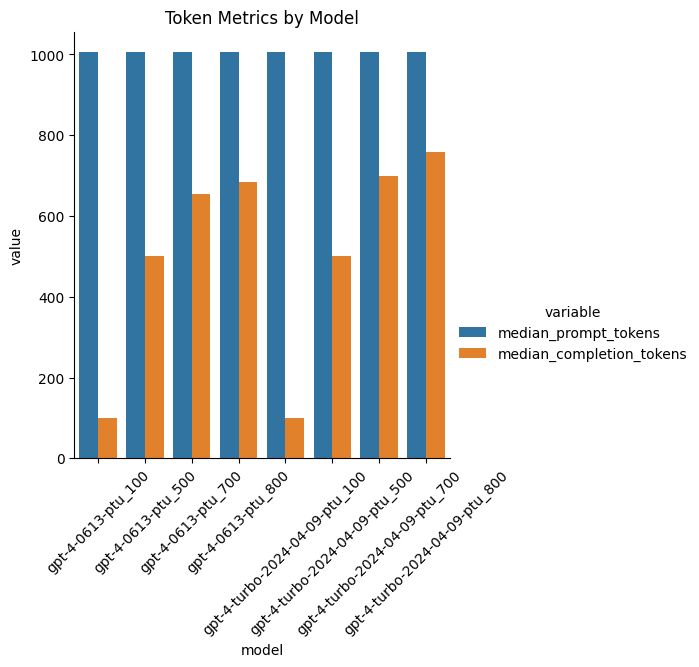

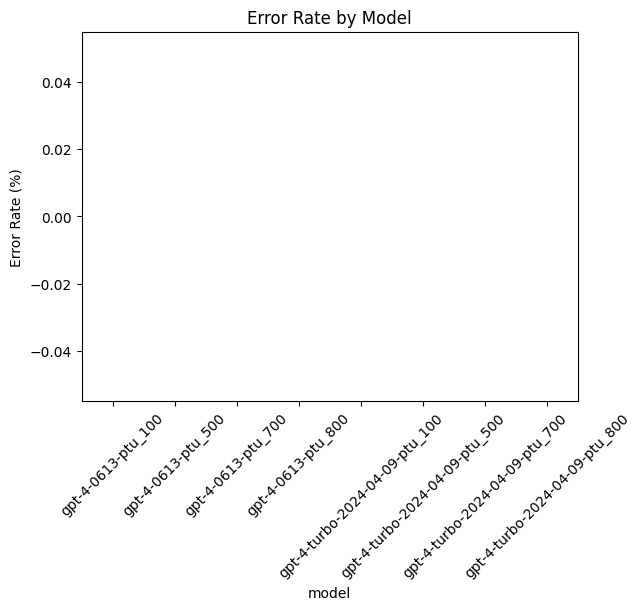

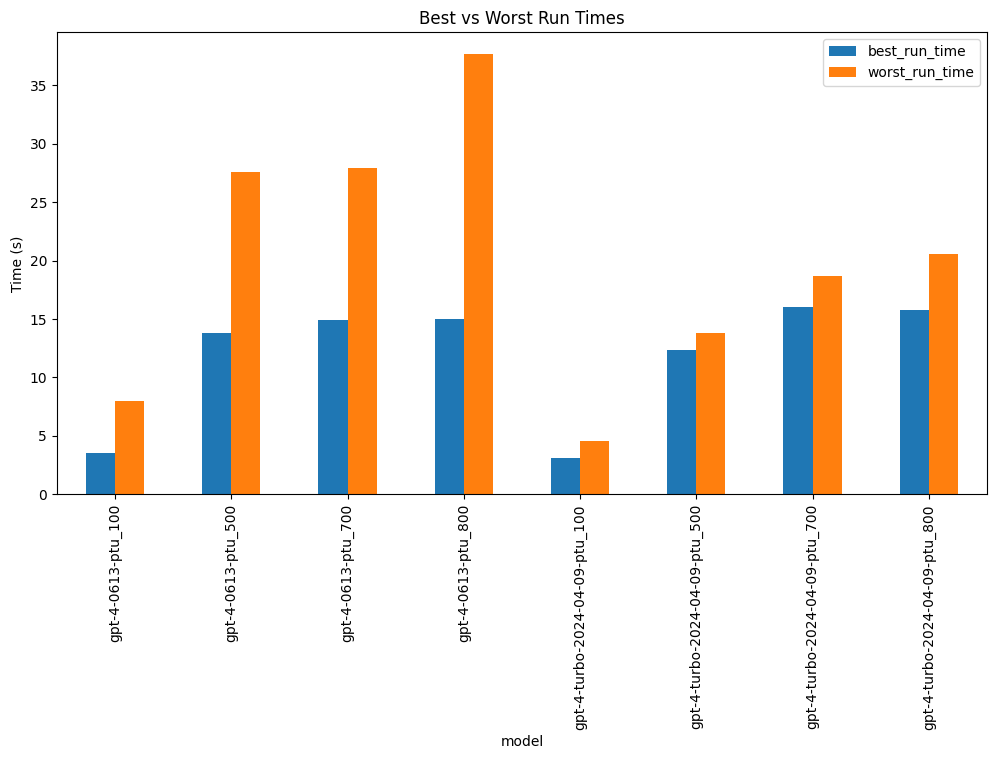

2024-06-03 19:05:02,023 - micro - MainProcess - ERROR    An error occurred while plotting the heatmap: unhashable type: 'list' (stats.py:plot_heatmaps:133)


<Figure size 1000x800 with 0 Axes>

In [12]:
visualizer.visualize_all()

## Combined

In [15]:
visualizer = ModelPerformanceVisualizer(data=combined_stats_2)

In [16]:
stats_df, best_worst_run_df = visualizer.transpose_data()

In [17]:
stats_df

ModelName_MaxTokens,gpt-4-turbo-2024-04-09-ptu_100,gpt-4-turbo-2024-04-09-ptu_500,gpt-4-turbo-2024-04-09-ptu_700,gpt-4-turbo-2024-04-09-ptu_800,gpt-4-0613-ptu_100,gpt-4-0613-ptu_500,gpt-4-0613-ptu_800,gpt-4-0613-ptu_700
median_time,3.424707,13.090394,17.782968,19.570614,3.559293,14.150249,19.282746,19.082103
regions,[Sweden Central],[Sweden Central],[Sweden Central],[Sweden Central],[Sweden Central],[Sweden Central],[Sweden Central],[Sweden Central]
iqr_time,0.296698,0.502333,0.592813,1.369085,0.21331,0.524349,1.772596,0.997907
percentile_95_time,4.854515,14.019611,19.608737,20.916672,4.145424,15.371617,21.768435,21.802304
percentile_99_time,5.542124,15.043865,21.992466,22.039974,4.698114,16.279443,22.024362,21.990981
cv_time,0.144473,0.041354,0.059583,0.059145,0.080405,0.044755,0.081288,0.062172
median_completion_tokens,100.0,500.0,700.0,766.5,100.0,500.0,667.0,666.0
iqr_completion_tokens,0.0,0.0,0.0,68.25,0.0,0.0,67.0,54.0
percentile_95_completion_tokens,100.0,500.0,700.0,800.0,100.0,500.0,735.2,700.0
percentile_99_completion_tokens,100.0,500.0,700.0,800.0,100.0,500.0,773.96,700.0


In [18]:
best_worst_run_df

ModelName_MaxTokens,gpt-4-turbo-2024-04-09-ptu_100,gpt-4-turbo-2024-04-09-ptu_500,gpt-4-turbo-2024-04-09-ptu_700,gpt-4-turbo-2024-04-09-ptu_800,gpt-4-0613-ptu_100,gpt-4-0613-ptu_500,gpt-4-0613-ptu_800,gpt-4-0613-ptu_700
best_run_time,3.295035,12.608985,15.602438,15.895453,3.469894,13.796731,15.34396,16.90897
best_run_completion_tokens,100,500,626,616,100,500,555,604
best_run_prompt_tokens,1002,1006,1006,1004,1005,1006,1005,1006
best_run_region,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central
best_run_utilization,0.00%,1.33%,0.00%,0.00%,13.52%,57.45%,45.82%,20.38%
best_run_local_time,2024-05-15 14:27:58 CEST,2024-05-15 14:27:34 CEST,2024-05-15 14:40:40 CEST,2024-05-15 14:32:45 CEST,2024-05-14 05:59:24 CEST,2024-05-14 06:01:12 CEST,2024-05-14 06:01:08 CEST,2024-05-14 06:03:58 CEST
worst_run_time,5.877806,15.873206,23.54875,22.314562,4.858917,16.554846,22.069516,22.000213
worst_run_completion_tokens,100,500,700,768,100,500,785,631
worst_run_prompt_tokens,1004,1006,1005,1003,1006,1004,1004,1004
worst_run_region,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central,Sweden Central
